# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
ERROR: pip's

## Importing the necessary libraries

In [79]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [2]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
from google.colab import files

print("Please upload the True.csv file:")
uploaded_true = files.upload()

print("Please upload the Fake.csv file:")
uploaded_fake = files.upload()

# # Load the uploaded files into pandas DataFrames
# true_df = pd.read_csv(list(uploaded_true.keys())[0])
# fake_df = pd.read_csv(list(uploaded_fake.keys())[0])

print("Files uploaded and loaded successfully.")

Please upload the True.csv file:


Please upload the Fake.csv file:


Files uploaded and loaded successfully.


In [4]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')

## **1.** Data Preparation





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
true_df.head(3)

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head(3)

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"


In [7]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
# Print the column names of both DataFrames

print(f'Columns in True news: {true_df.columns.tolist()}')
print(f'Columns in Fake news: {fake_df.columns.tolist()}')

Columns in True news: ['title', 'text', 'date']
Columns in Fake news: ['title', 'text', 'date']


### **1.1** Add new column  

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], ignore_index= True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
news_df.isnull().sum()

,0
title,21
text,21
date,42
news_label,0


In [14]:
# Handle Rows with Null Values
news_df.dropna(inplace = True)

In [15]:
news_df.reset_index(drop = True, inplace = True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [16]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'] + ' ' + news_df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df.drop(columns= ['title', 'text', 'date'], inplace= True)

# Display the first 5 rows of the updated DataFrame to check the result
news_df.head(3)

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...


In [17]:
news_df.head(3)

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...


## **2.** Text Preprocessing  <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [18]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news_df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements <br>



In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
  # Convert to lower case
  text = text.lower()

  # Remove text in square brackets
  text = re.sub('\[.*?\]', '', text)

  # Remove punctuation
  text = re.sub(f'[{string.punctuation}]', '', text)

  # Remove words with numbers
  text = re.sub(r'\b(?=\w*[A-Za-z])\w*\d\w*\b', '', text)

  return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <br>


In [21]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['clean_text'] = news_df['news_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization<br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags  <br>



In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

def lammetize_and_filter(text):

  stop_words = set(stopwords.words('english'))
  doc = nlp(text)

  filtered_tokens = [
      token.lemma_ for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.text not in stop_words
  ]

  return ' '.join(filtered_tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame.  <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [24]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean['lemmatized_text'] = df_clean['clean_text'].apply(lammetize_and_filter)

### Save the Cleaned data as a csv file (Recommended)

In [80]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [81]:
# Check the first few rows of the DataFrame
df_clean.head(3)

,news_label,clean_text,lemmatized_text
0,1,as us budget fight looms republicans flip thei...,budget fight republicans script washington hea...
1,1,us military to accept transgender recruits on ...,military transgender recruit monday pentagon w...
2,1,senior us republican senator let mr mueller do...,us republican senator mr mueller job washingto...


In [82]:
# Check the dimensions of the DataFrame
df_clean.dropna(inplace= True)
df_clean.shape

(44889, 3)

In [83]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44889 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44889 non-null  int64 
 1   clean_text       44889 non-null  object
 2   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split  <br>

In [84]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
X = df_clean[['clean_text', 'lemmatized_text']]
y = df_clean['news_label']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state= 23)

In [85]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31422, 2), (13467, 2), (31422,), (13467,))

## **4.** Exploratory Data Analysis on Training Data  <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns <br>



In [86]:
# Add a new column to calculate the character length of cleaned news text
X_train['clean_text_length'] = X_train['clean_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_train['lemmatized_text_length'] = X_train['lemmatized_text'].apply(len)

In [87]:
X_train.isna().sum()

,0
clean_text,0
lemmatized_text,0
clean_text_length,0
lemmatized_text_length,0


##### 4.1.2  Create Histogram to visualise character lengths  <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

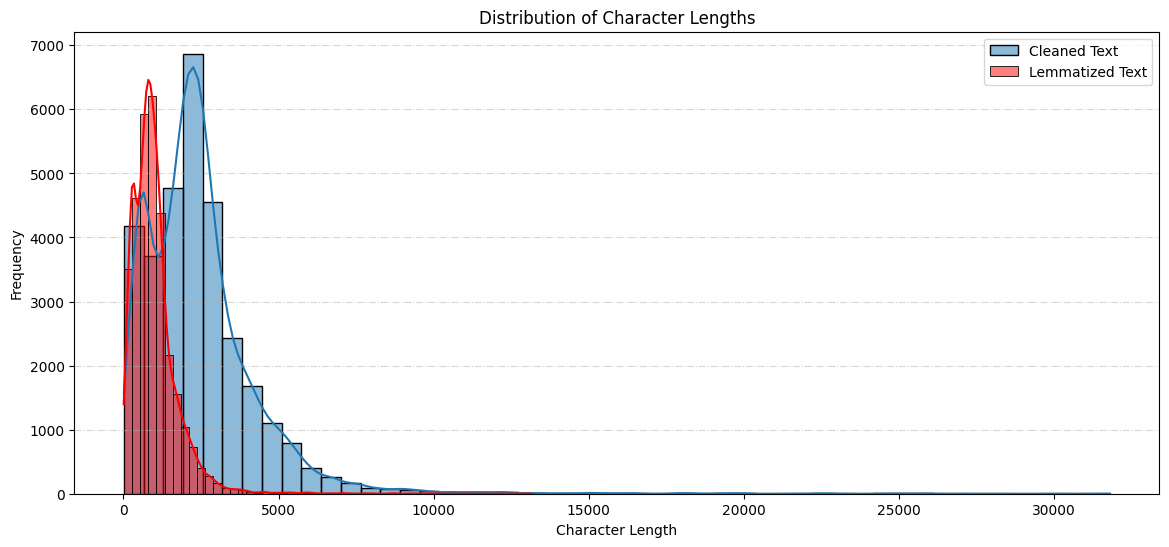

In [88]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize= (14, 6))
# Add histogram for cleaned news text
sns.histplot(X_train['clean_text_length'], bins= 50, kde= True, label= 'Cleaned Text')

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(X_train['lemmatized_text_length'], bins= 50, kde= True, color= 'red', label= 'Lemmatized Text')

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.5)
plt.legend()
plt.title('Distribution of Character Lengths')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text <br>

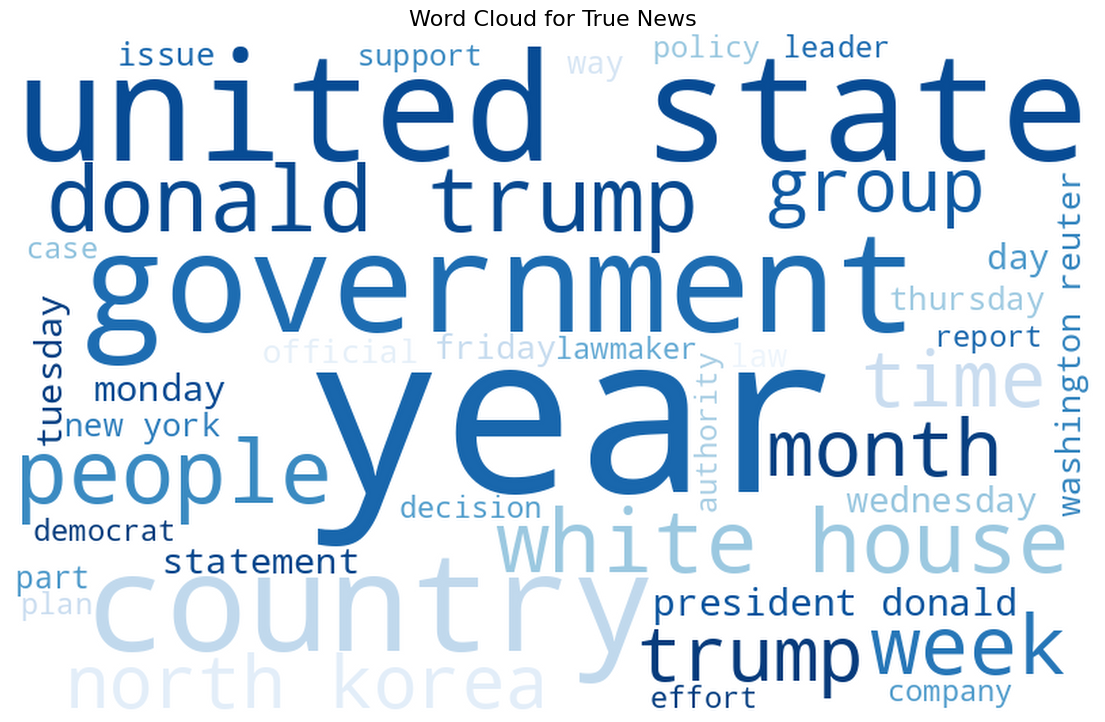

In [89]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = X_train[y_train == 1]['lemmatized_text'].str.cat(sep= ' ')

# Generate word cloud for True News
wordcloud_true = WordCloud(
    width= 800,
    height= 500,
    background_color= 'white',
    colormap= 'Blues',
    max_words= 40,
    collocations= True,
    random_state= 1
).generate(true_news)

# Display
plt.figure(figsize= (14, 10))
plt.imshow(wordcloud_true, interpolation= 'lanczos')
plt.axis('off')
plt.title('Word Cloud for True News', fontsize= 16)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <br>

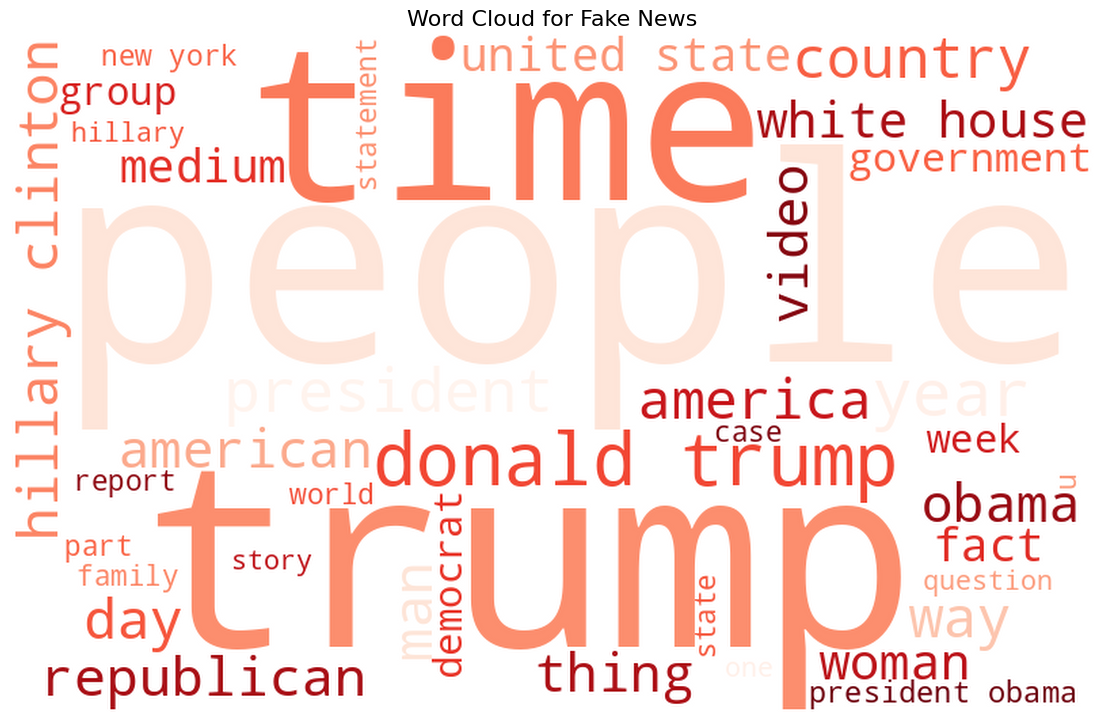

In [90]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = X_train[y_train == 0]['lemmatized_text'].str.cat(sep= ' ', na_rep= '')

# Generate word cloud for Fake News
wordclout_false = WordCloud(
    width= 800,
    height= 500,
    background_color= 'white',
    colormap= 'Reds',
    max_words= 40,
    collocations= True,
    random_state= 1
).generate(fake_news)

# Display
plt.figure(figsize= (14, 10))
plt.imshow(wordclout_false, interpolation= 'lanczos')
plt.title('Word Cloud for Fake News', fontsize= 16)
plt.axis('off')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <br>




##### 4.3.1 Write a function to get the specified top n-grams  <br>



In [91]:
# Write a function to get the specified top n-grams

def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):

    # Initialize CountVectorizer to create n-gram counts
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Sum up the counts of each n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()

    # Combine n-grams and their frequencies
    ngram_freq = list(zip(ngram_features, ngram_counts))

    # Sort by frequency (descending)
    top_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

    return top_ngrams


##### 4.3.2 Handle the NaN values  <br>



In [92]:
# Handle NaN values in the text data
X_val.isnull().sum()

,0
clean_text,0
lemmatized_text,0


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph   <br>

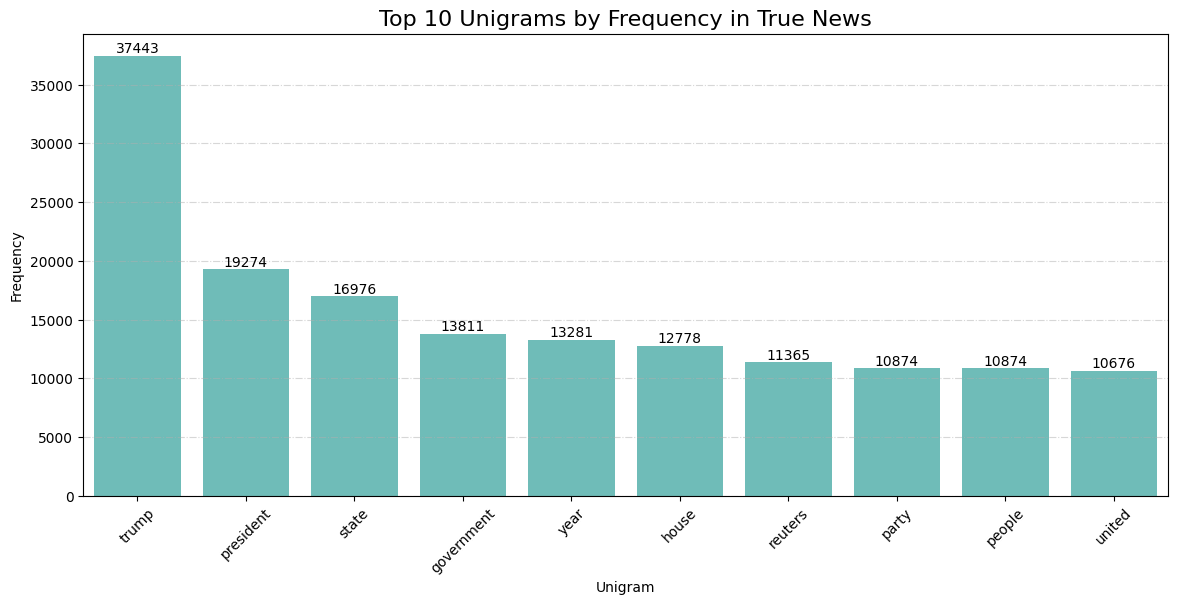

In [93]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_unigram_top10 = get_top_ngrams(X_train[y_train == 1]['lemmatized_text'], n= 10, ngram_range= (1, 1))

true_unigram_top10 = pd.DataFrame(true_unigram_top10, columns= ['unigram', 'frequency'])
# display(true_unigram_top10)

plt.figure(figsize= (14, 6))
axes = sns.barplot(x= 'unigram', y= 'frequency', data= true_unigram_top10, color= 'lightseagreen', alpha= 0.7)


axes.bar_label(axes.containers[0])

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.5)
plt.title('Top 10 Unigrams by Frequency in True News', fontsize= 16)
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation= 45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph <br>



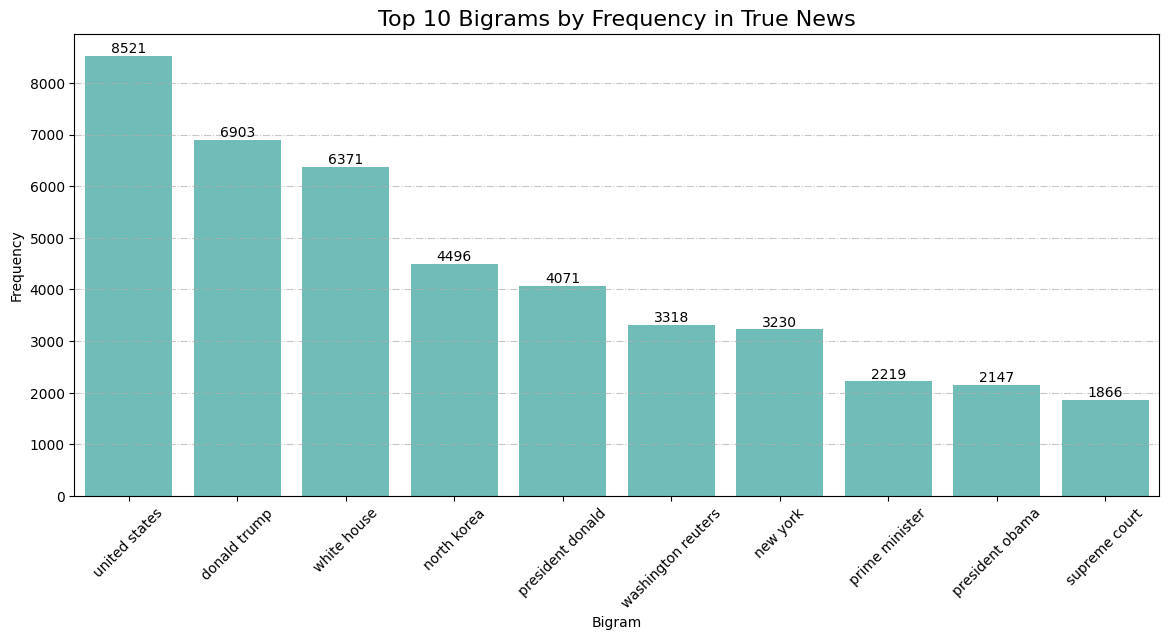

In [94]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigram_top10 = get_top_ngrams(X_train[y_train == 1]['lemmatized_text'], n= 10, ngram_range= (2, 2))

true_bigram_top10 = pd.DataFrame(true_bigram_top10, columns= ['bigram', 'frequency'])

# Display the barplot and count
plt.figure(figsize= (14,6))
axes = sns.barplot(x= 'bigram', y= 'frequency', data= true_bigram_top10, color= 'lightseagreen', alpha= 0.7)

axes.bar_label(axes.containers[0])

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.7)
plt.title('Top 10 Bigrams by Frequency in True News', fontsize= 16)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation= 45)
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <br>



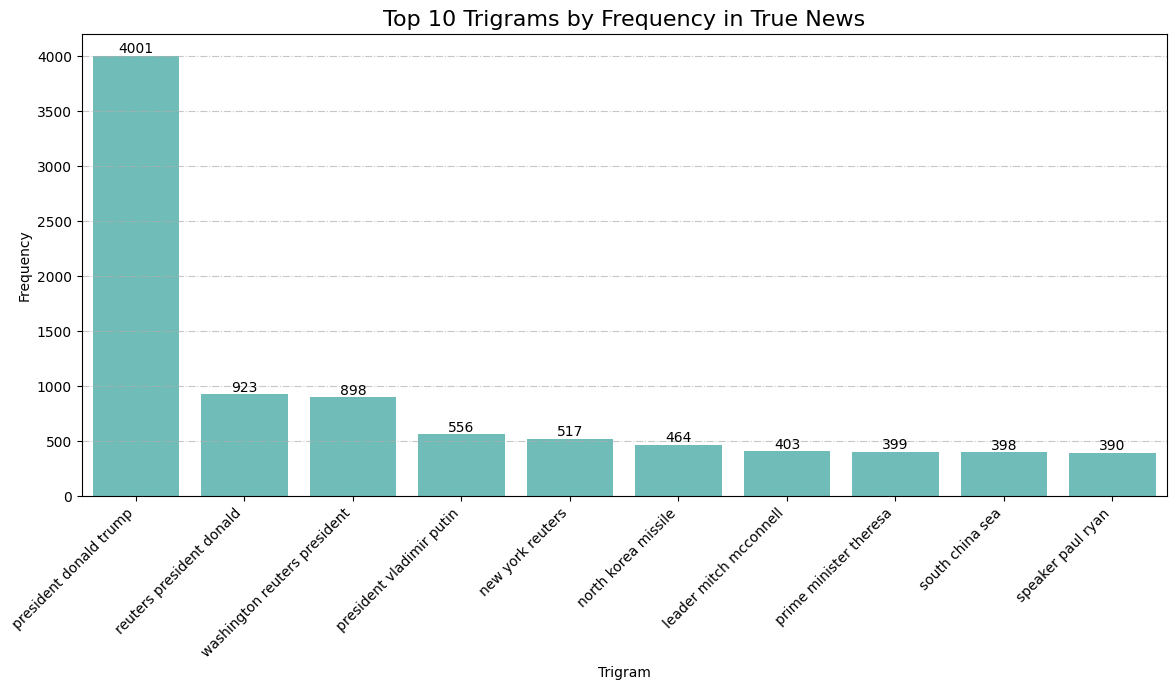

In [95]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigram_top10 = get_top_ngrams(X_train[y_train == 1]['lemmatized_text'], n= 10, ngram_range= (3, 3))

true_trigram_top10 = pd.DataFrame(true_trigram_top10, columns= ['trigram', 'frequency'])

# Display
plt.figure(figsize= (14,6))
axes = sns.barplot(x= 'trigram', y= 'frequency', data= true_trigram_top10, color= 'lightseagreen', alpha= 0.7)

axes.bar_label(axes.containers[0])

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.7)
plt.title('Top 10 Trigrams by Frequency in True News', fontsize= 16)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <br>

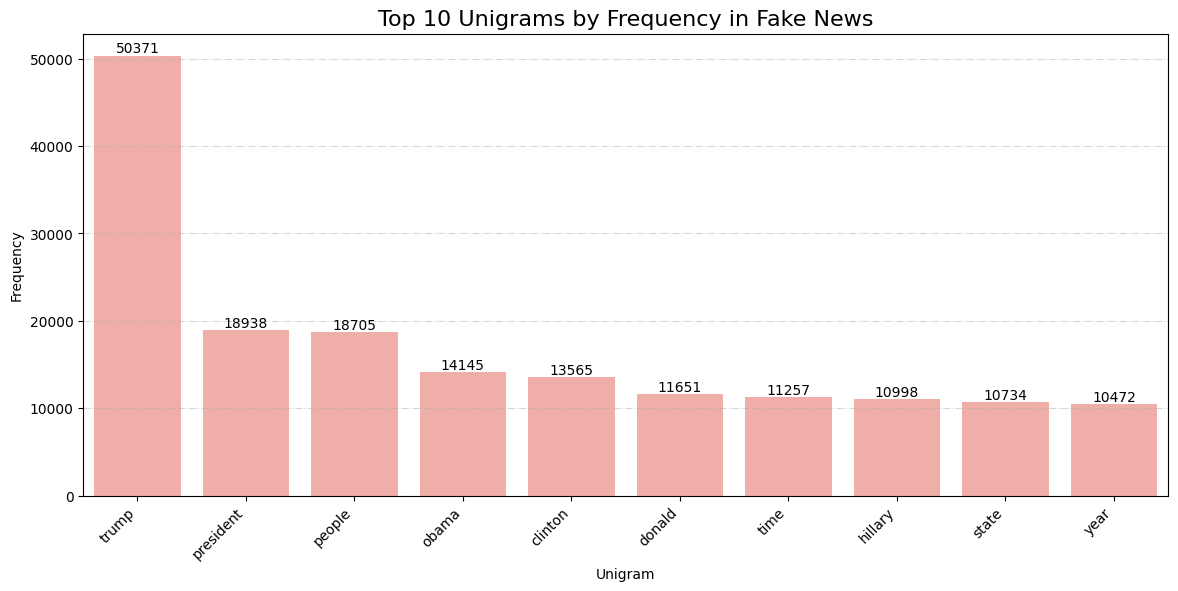

In [96]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_unigram_top10 = get_top_ngrams(X_train[y_train == 0]['lemmatized_text'], n= 10, ngram_range= (1, 1))

fake_unigram_top10 = pd.DataFrame(fake_unigram_top10, columns= ['unigram', 'frequency'])


plt.figure(figsize= (14, 6))
axes = sns.barplot(x= 'unigram', y= 'frequency', data= fake_unigram_top10, color= 'salmon', alpha= 0.7)


axes.bar_label(axes.containers[0])

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.5)
plt.title('Top 10 Unigrams by Frequency in Fake News', fontsize= 16)
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph <br>



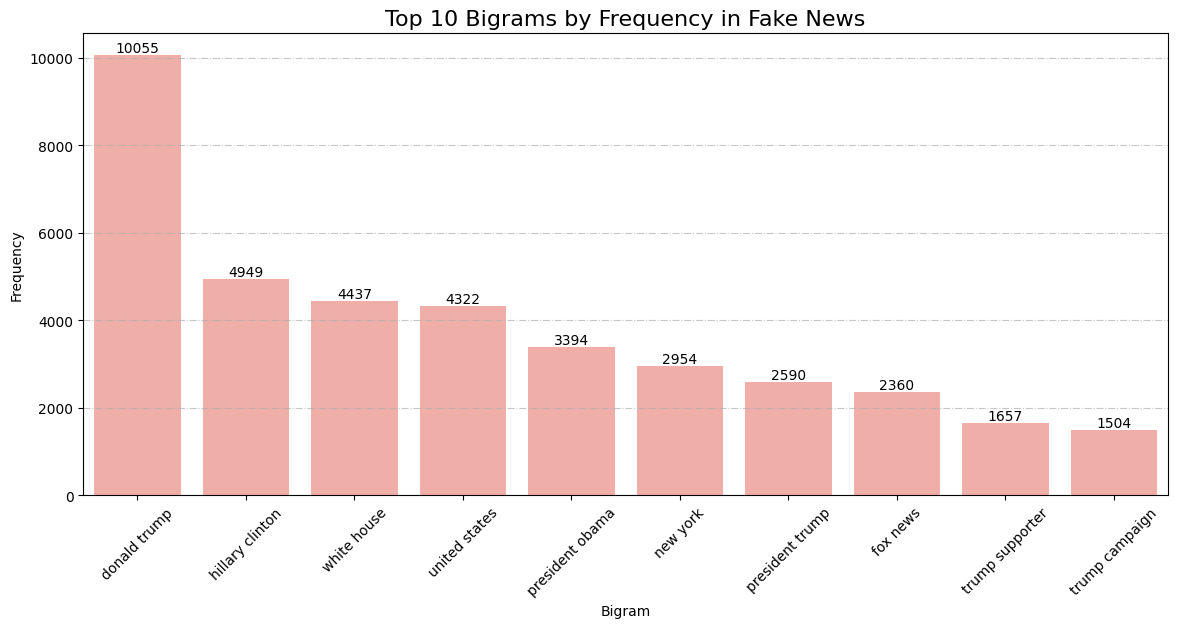

In [97]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigram_top10 = get_top_ngrams(X_train[y_train == 0]['lemmatized_text'], n= 10, ngram_range= (2, 2))

fake_bigram_top10 = pd.DataFrame(fake_bigram_top10, columns= ['bigram', 'frequency'])

# Display the barplot and count
plt.figure(figsize= (14,6))
axes = sns.barplot(x= 'bigram', y= 'frequency', data= fake_bigram_top10, color= 'salmon', alpha= 0.7)

axes.bar_label(axes.containers[0])

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.7)
plt.title('Top 10 Bigrams by Frequency in Fake News', fontsize= 16)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation= 45)
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph <br>



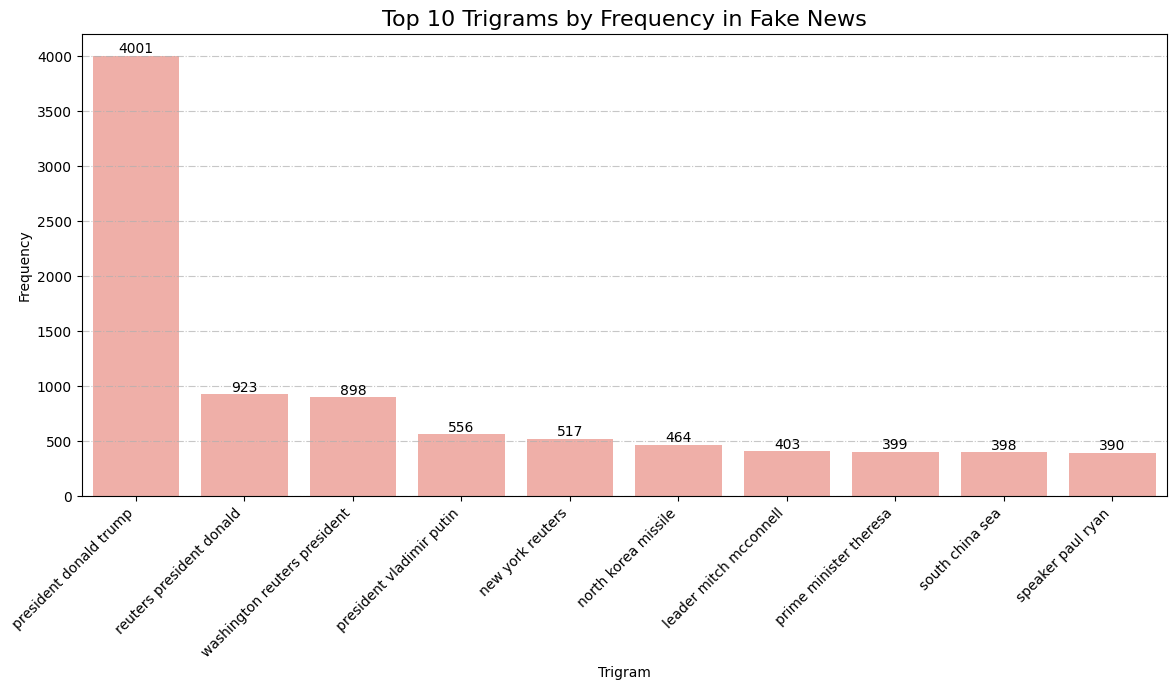

In [98]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigram_top10 = get_top_ngrams(X_train[y_train == 0]['lemmatized_text'], n= 10, ngram_range= (3, 3))

fake_trigram_top10 = pd.DataFrame(true_trigram_top10, columns= ['trigram', 'frequency'])

# Display
plt.figure(figsize= (14,6))
axes = sns.barplot(x= 'trigram', y= 'frequency', data= fake_trigram_top10, color= 'salmon', alpha= 0.7)

axes.bar_label(axes.containers[0])

plt.grid(axis= 'y', linestyle= '-.', alpha= 0.7)
plt.title('Top 10 Trigrams by Frequency in Fake News', fontsize= 16)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

## **6.** Feature Extraction  <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model

In [112]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.3 MB/s eta 0:00:00


In [116]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

from gensim.models import KeyedVectors
model_path = '/content/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(model_path, binary=True)

### **6.2** Extract vectors for cleaned news data

In [117]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_vectors(text, model, vector_size=300):
  words = text.split()
  word_vectors = []

  for word in words:
    if word in model:
      word_vectors.append(model[word])

  if word_vectors:
    return np.mean(word_vectors, axis=0)
  else:
    return np.zeros(vector_size)


## Extract the target variable for the training data and validation data
X_train_vectors = np.array([get_vectors(text, word_vectors) for text in tqdm(X_train['lemmatized_text'].astype(str), desc= 'Processing Training')])
X_val_vectors = np.array([get_vectors(text, word_vectors) for text in tqdm(X_val['lemmatized_text'].astype(str), desc= 'Processing Validation')])

Processing Validation: 100%|██████████| 13467/13467 [00:06<00:00, 2232.91it/s]


In [121]:
X_train_vectors.shape

(31422, 300)

## **7.** Model Training and Evaluation

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model

##### 7.1.1 Create and train logistic regression model on training data

In [155]:
## Initialise Logistic Regression model
lr = LogisticRegression(penalty= 'l2', max_iter= 5000, C= 5, random_state=1)

## Train Logistic Regression model on training data
lr.fit(X_train_vectors, y_train)

## Predict on validation data
lr_predict = lr.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data

In [156]:
def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print(f'Accuracy: {accuracy:.2f}')
  print(f'Precision: {precision:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'F1-score: {f1:.2f}')

In [157]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

print('Evaluation Metrics for Logistic Regression Model')
evaluate_model(y_val, lr_predict)

Evaluation Metrics for Logistic Regression Model
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-score: 0.93


In [158]:
# Classification Report
print('Classification Report for Logistic Regression Model\n')
print(classification_report(y_val, lr_predict))

Classification Report for Logistic Regression Model

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7008
           1       0.93      0.93      0.93      6459

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



### **7.2** Build Decision Tree Model

##### 7.2.1 Create and train a decision tree model on training data

In [208]:
## Initialise Decision Tree model
dt = DecisionTreeClassifier(criterion= 'entropy', min_impurity_decrease= 0.00001, min_weight_fraction_leaf= 0.00001, random_state= 1)

## Train Decision Tree model on training data
dt.fit(X_train_vectors, y_train)

## Predict on validation data
dt_predict = dt.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data

In [209]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print('Evaluation Metrics for Decision Tree Model')
evaluate_model(y_val, dt_predict)

Evaluation Metrics for Decision Tree Model
Accuracy: 0.86
Precision: 0.86
Recall: 0.83
F1-score: 0.85


In [210]:
# Classification Report
print('Classification Report for Decision Tree Model\n')
print(classification_report(y_val, dt_predict))

Classification Report for Decision Tree Model

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      7008
           1       0.86      0.83      0.85      6459

    accuracy                           0.86     13467
   macro avg       0.86      0.85      0.86     13467
weighted avg       0.86      0.86      0.86     13467



### **7.3** Build Random Forest Model


##### 7.3.1 Create and train a random forest model on training data

In [248]:
## Initialise Random Forest model
rf = RandomForestClassifier(n_estimators= 500,
                            criterion= 'entropy',
                            min_weight_fraction_leaf= 0.00001,
                            min_impurity_decrease= 0.00001,
                            n_jobs= -1,
                            random_state= 1)

## Train Random Forest model on training data
rf.fit(X_train_vectors, y_train)

## Predict on validation data
rf_predict = rf.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data

In [249]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print('Evaluation Metrics for Random Forest Model')
evaluate_model(y_val, rf_predict)

Evaluation Metrics for Random Forest Model
Accuracy: 0.93
Precision: 0.93
Recall: 0.92
F1-score: 0.93


In [250]:
# Classification Report
print('Classification Report for Random Forest Model\n')
print(classification_report(y_val, rf_predict))

Classification Report for Random Forest Model

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7008
           1       0.93      0.92      0.93      6459

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



## **8.** Conclusion



This project focused on developing and evaluating machine learning models for **fake news detection** using text-based features. The workflow included preprocessing the dataset (tokenization, stopword removal, and TF-IDF vectorization), building multiple models, and evaluating them on a held-out validation set.

---

### **Performance Summary**

| Model | Accuracy | Precision | Recall | F1-Score |
|:------|----------:|-----------:|--------:|----------:|
| **Logistic Regression** | **0.93** | **0.93** | **0.93** | **0.93** |
| **Decision Tree Classifier** | **0.86** | **0.86** | **0.83** | **0.85** |
| **Random Forest Classifier** | **0.93** | **0.93** | **0.92** | **0.93** |

The dataset contained a balanced distribution of samples across the two classes (≈7,008 real and 6,459 fake instances), totaling **13,467 validation samples**.

---

### **Interpretation of Results**

- **Logistic Regression** showed **strong and consistent performance** across all metrics, confirming that linear decision boundaries effectively separate fake and real news in this feature space. Regularization likely contributed to its robustness and generalization.

- **Random Forest** achieved performance almost identical to Logistic Regression, showing that ensemble-based nonlinear models can match linear baselines when features are informative. Its high accuracy also confirms that the dataset’s structure is well captured by the current representation.

- **Decision Tree**, while slightly behind (Accuracy = 0.86, F1 = 0.85), still performed reasonably well. The drop in accuracy is expected for a single-tree model applied to sparse, high-dimensional text data. However, it provides interpretability benefits, helping identify decision thresholds and key features.

---

### **Insights from Model Behavior**

- Both **Logistic Regression** and **Random Forest** highlight the effectiveness of the text preprocessing and feature extraction pipeline.
- **Decision Tree** remains a useful diagnostic tool for visualizing how the data splits and understanding model reasoning.
- The similarity in performance between Logistic Regression and Random Forest indicates that the dataset is **clean, balanced, and semantically rich**.

---

### **General Observations**

- Models maintained a strong balance between **precision** and **recall**, ensuring that neither false positives nor false negatives dominate the results.
- High **F1-scores (~0.93)** indicate consistent performance across both classes.
- The **>90% accuracy** across the best models validates the overall design of the preprocessing and modeling pipeline.

---


### **Final Remarks**

Overall, the results demonstrate that **traditional machine learning models remain highly competitive** for fake news detection when paired with effective preprocessing.  
Both **Logistic Regression** and **Random Forest** achieved ~93% accuracy and F1-scores, confirming their reliability and robustness.  
Meanwhile, the **Decision Tree model**, though less accurate, adds interpretability and clarity to the analysis process.  

This combination of **high performance and interpretability** forms a strong foundation for further advancement in automated misinformation detection systems.
